In [1]:
from luwiji.style_transfer import illustration

# Neural Style Transfer

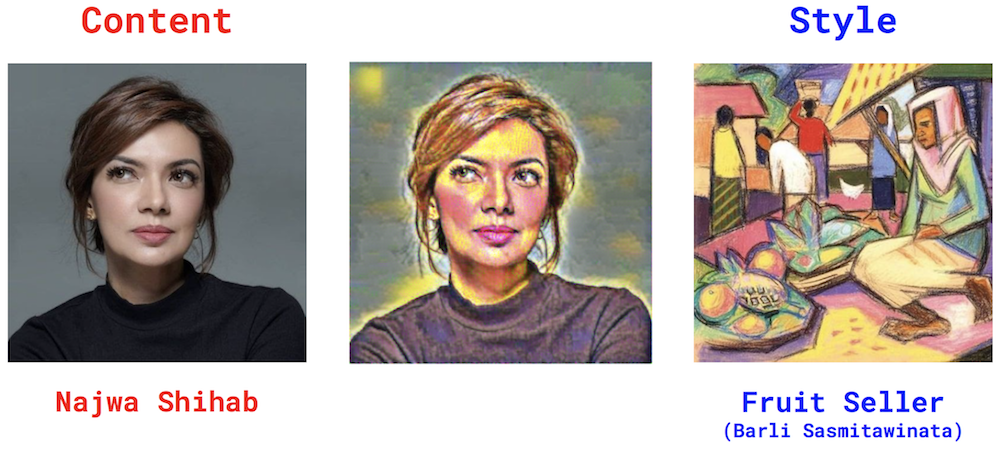

In [2]:
illustration.result

# Cara Training Neural Style Transfer

Seperti di materi CNN, kita sudah pahami bahwa feature map hasil konvolusi memiliki informasi yang merepresentasikan gambar semula sehingga dapat kita gunakan sebagai fitur.

Untuk review, silahkan cek video [Deep Visualization Toolbox](https://www.youtube.com/watch?v=AgkfIQ4IGaM)

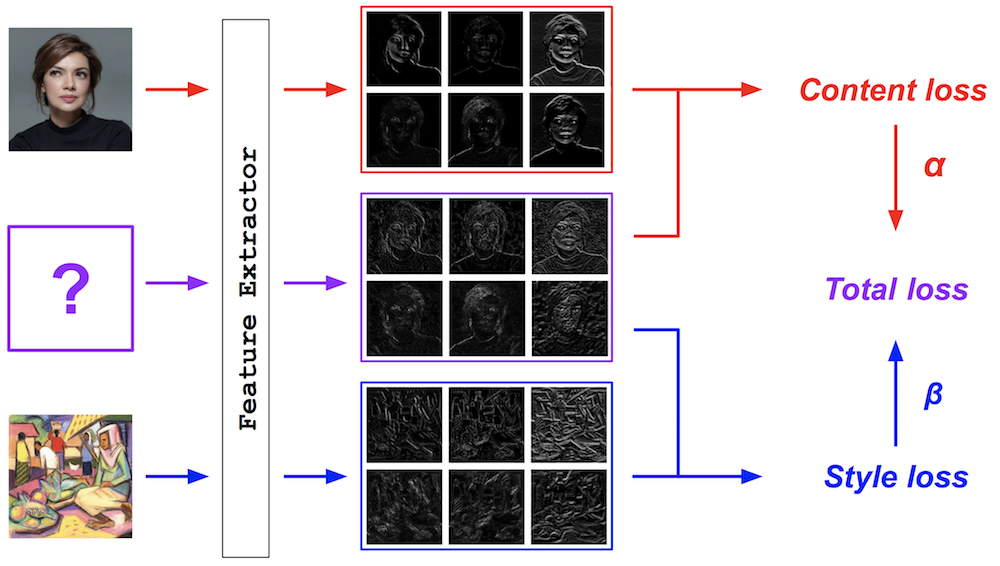

In [3]:
illustration.style_transfer

# Representasi Content -> Feature map

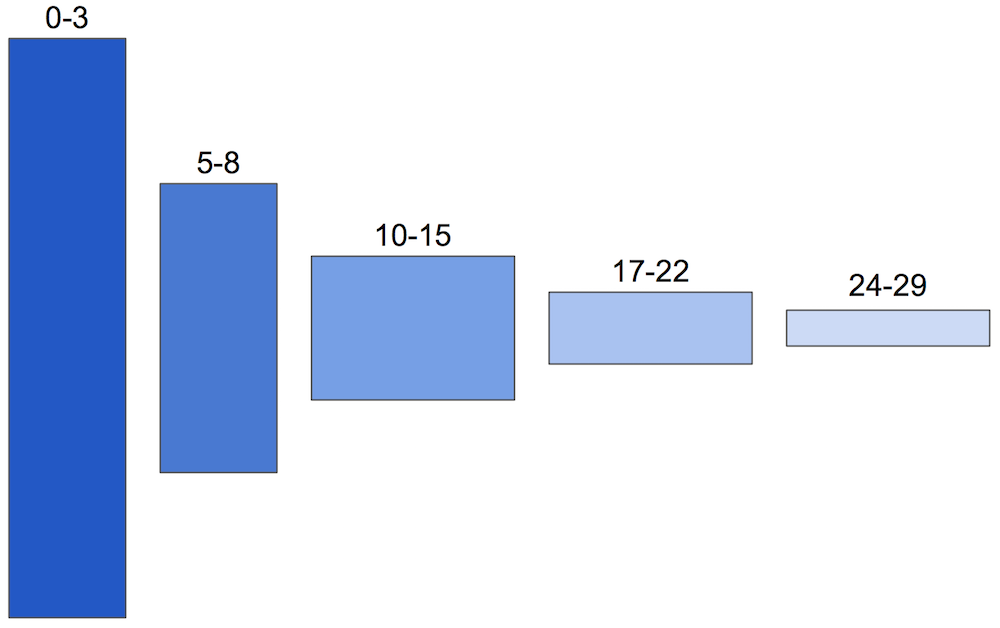

In [4]:
illustration.vgg16_layers

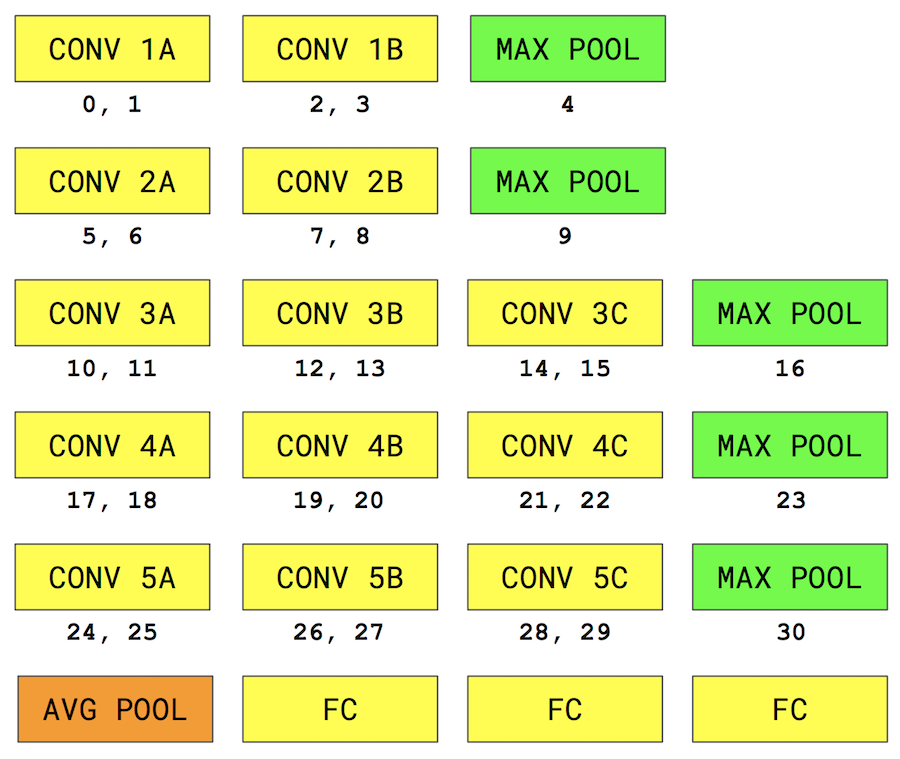

In [5]:
illustration.vgg16

# Representasi Style -> Gram Matrix

Di paper [Neural Algorithm of Artistic Style](https://arxiv.org/pdf/1508.06576.pdf), Gatys et al. merekomendasikan korelasi antar filter sebagai **informasi tekstur dari suatu gambar**, dan itu dapat direpresentasikan juga dengan **Gram Matrix**.

```
To obtain a representation of the style of an input image, we use a feature space originally designed to capture texture information. This feature space is built on top of the filter responses in each layer of the network. It consists of the correlations between the different filter responses over the spatial extent of the feature maps (see Methods for details). By including the feature correlations of multiple layers, we obtain a stationary, multi-scale representation of the input image, which captures its texture information but not the global arrangement.

- Gatys et al., 2015
```

Untuk lebih detail, bisa cek juga paper [Texture Synthesis Using Convolutional Neural Networks](https://arxiv.org/pdf/1505.07376.pdf) yang juga dituliis oleh Gatys et al.

Gram matrix adalah perkalian antara suatu matriks dengan transpose dari dirinya sendiri
\begin{equation}
G = X^TX 
\end{equation}

Karena di deep learning kita merepresentasikan kolom matriks sebagai fitur, maka perhitungan Gram Matrixnya menjadi
\begin{equation}
G = XX^T 
\end{equation}

Untuk data image dengan ukuran NCHW, maka kita dapat melakukan flattening, dan Gram Matrix nya (PyTorch) adalah

```python
def gram_matrix(X):
    n, c, h, w = X.shape
    X = X.view(n*c, h*w) # Flattening
    G = torch.mm(X, X.t())
    G = G.div(n*c*h*w) # Normalization
    return G
```

# Total loss = $\alpha$ * Content Loss + $\beta$ * Style Loss

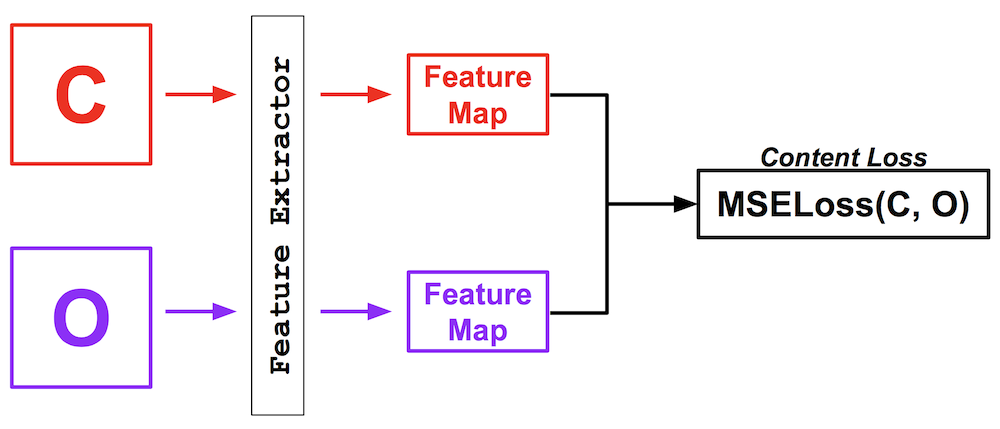

In [6]:
illustration.content_loss

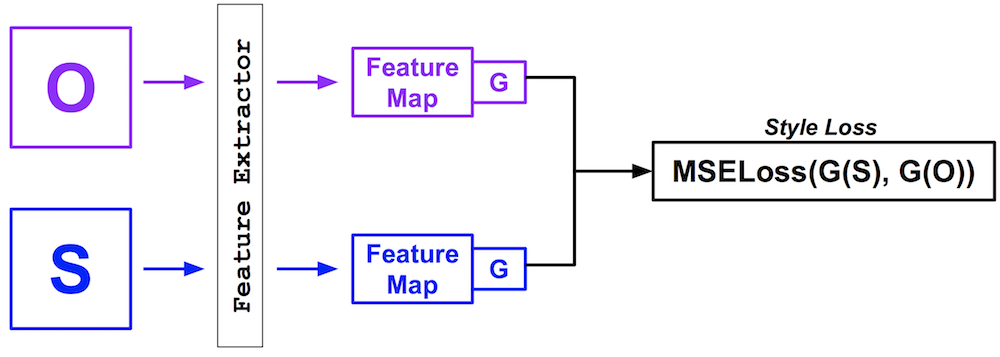

In [7]:
illustration.style_loss

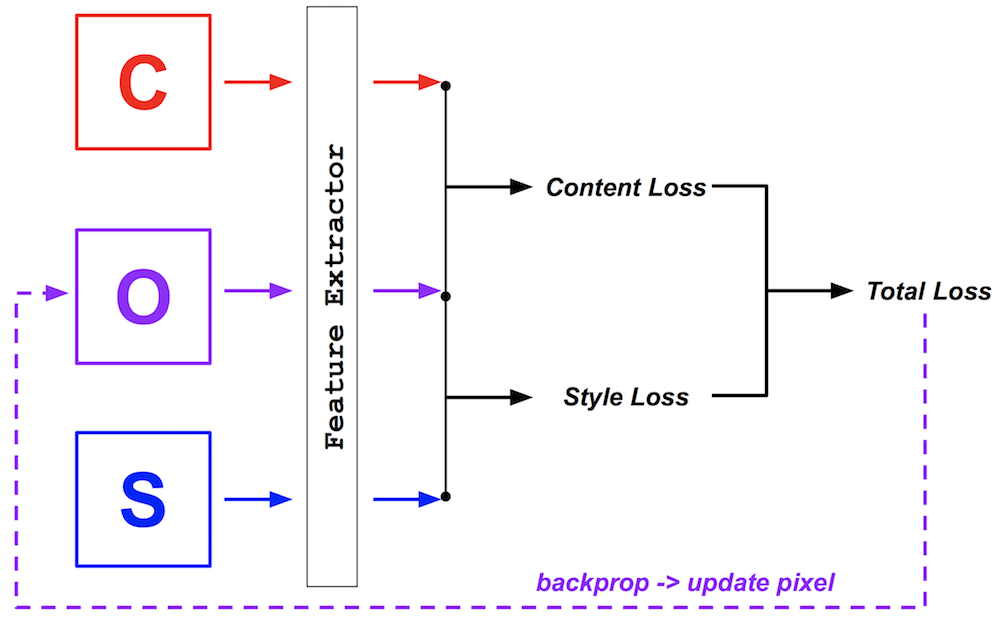

In [8]:
illustration.total_loss

# Memilih Layer Fitur yang digunakan

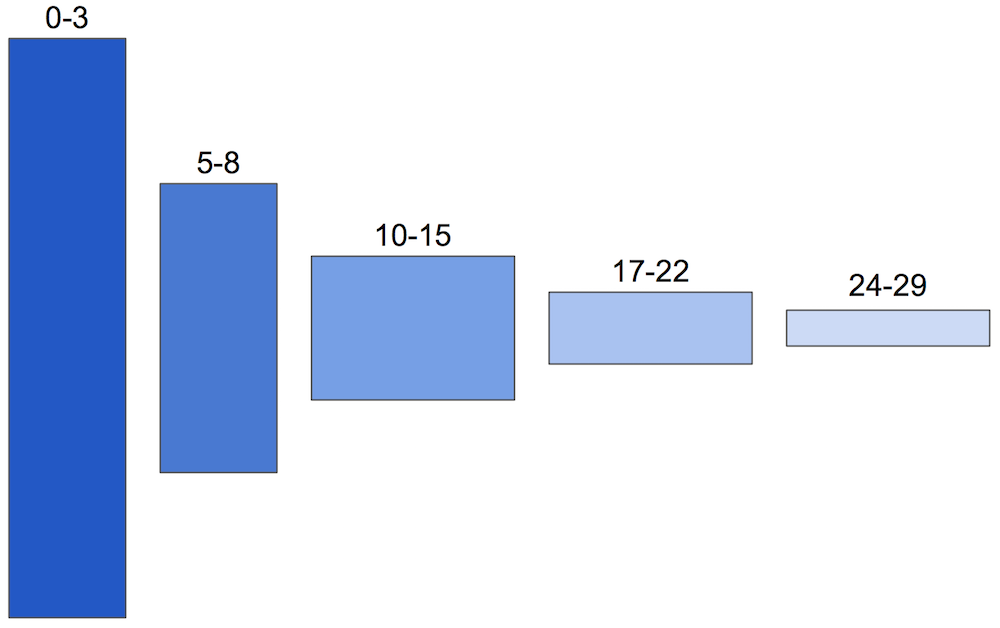

In [9]:
illustration.vgg16_layers

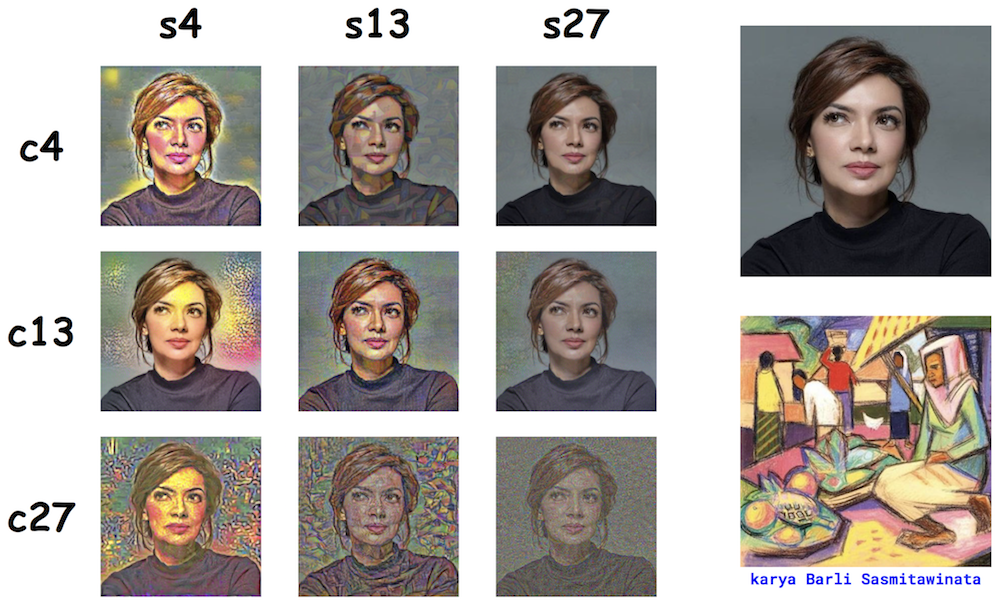

In [10]:
illustration.choose_layer1

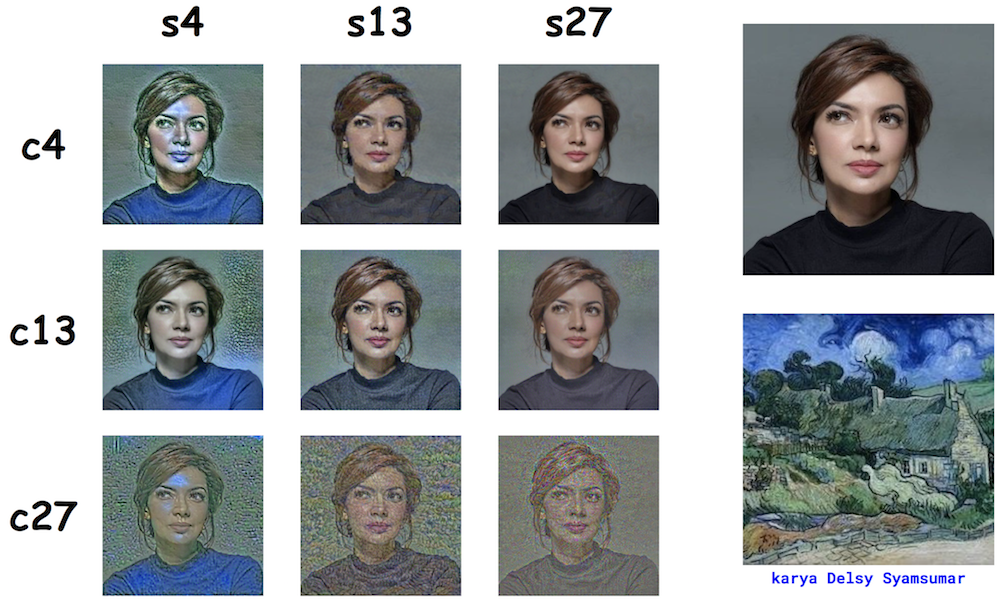

In [11]:
illustration.choose_layer2